In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl;from textwrap import wrap
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal

In [2]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [3]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/'; 
# Initialize the big dict:
Targets = ["Andrew","Constant","Valoen",] # _int=8e-19_360cyc
Scan_Num = [3,3,3]
Round_P3R11_Long = {}
for target,scan_num in zip(Targets,Scan_Num):
    target_filename = target + '_int=6e-19_2000cyc2'
    Round_P3R11_Long[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round_P3R11_Long[target][str(scan)]={}
        scan_name = str(scan) + 'th Scan'
        try:
            Round_P3R11_Long[target][str(scan)] = loadmat( 
            BasicPath  +   target_filename + "/" + scan_name + "/" 
            + scan_name + "-for_AGE_only.mat")
        except:
            print(f"Nothing in {target_filename}, Scan {scan}")

In [4]:
my_dict_AGE = Round_P3R11_Long['Andrew'][str(Scan_i)]
T_1 = my_dict_AGE["CD Time [h]"][0]
""" plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery concentration overpotential [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged EC concentration overpotential [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery electrolyte ohmic losses [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery solid phase ohmic losses [V]"][0][-1][0])
 """
print(my_dict_AGE["LLI to SEI in one CD step [A.h]"][0])
print(my_dict_AGE["Discharge capacity [A.h]"][0])
print(my_dict_AGE["LLI to SEI in one CD step [A.h]"][0]/my_dict_AGE["Discharge capacity [A.h]"][0])

NameError: name 'Scan_i' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

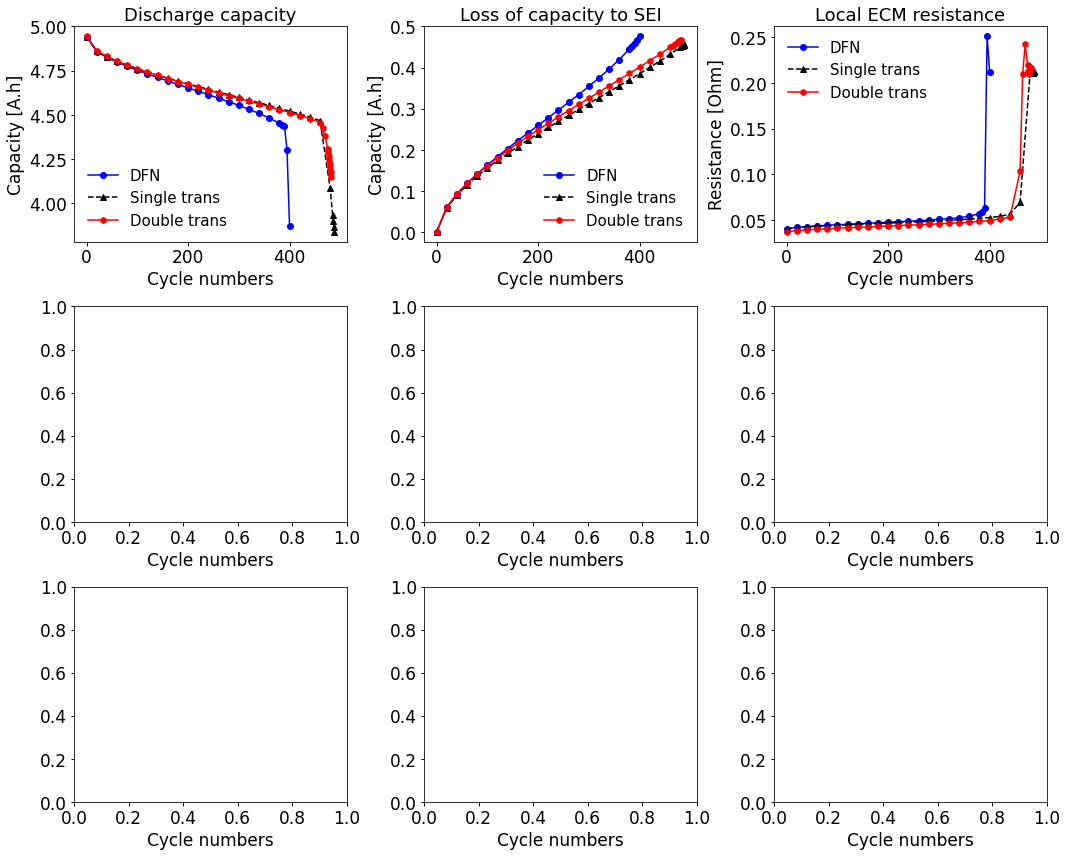

In [9]:
Scans = np.arange(1,4,1).tolist()
Str=[ 'DFN',  'Single trans', 'Double trans' ]
str_para = 'Andrew'   # "Andrew","Constant","Valoen"
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h']

fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
for Scan_i in range(1,4):
    Full_cycle = Round_P3R11_Long[str_para][str(Scan_i)]['Full_cycle'][0]
    my_dict_AGE = Round_P3R11_Long[str_para][str(Scan_i)]
    axs[0,0].plot(
        Full_cycle, 
        my_dict_AGE["Discharge capacity [A.h]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,1].plot(
        Full_cycle, 
        my_dict_AGE["CDend Loss of capacity to SEI [A.h]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,2].plot(
        Full_cycle, 
        my_dict_AGE["CDend Local ECM resistance [Ohm]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1})
    
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    for i in range(0,3):
        for j in range(0,3):
            axs[i,j].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)    

In [6]:
# plot Loc based variables for all cycles to see why rollover failure
Str=[ 'DFN',  'Single trans', 'Double trans' ]
str_para = 'Valoen'   # "Andrew","Constant","Valoen"
for i in range(1,4):
    scan_name = str(i)
    Full_cycle  = Round_P3R11_Long[str_para][scan_name]['Full_cycle'][0]
    my_dict_AGE = Round_P3R11_Long[str_para][scan_name]
    print(len(my_dict_AGE["CCend Negative electrode porosity"]))
    key_all_CDend = [
        "CDend Negative electrode porosity",
        "CDend Electrolyte concentration [mol.m-3]",
        "CDend EC concentration [mol.m-3]",
        "CDend Electrolyte potential [V]",
        "CDend Positive electrode potential [V]",
        "CDend Electrolyte current density [A.m-2]",
        "CDend Electrolyte diffusivity [m2.s-1]",
        "CDend Electrolyte conductivity [S.m-1]",
        "CDend Negative electrode SEI interfacial current density [A.m-2]",
    ]
    key_all_CCend = [
            "CCend Negative electrode porosity",
            "CCend Electrolyte concentration [mol.m-3]",
            "CCend EC concentration [mol.m-3]",
            "CCend Electrolyte potential [V]",
            "CCend Positive electrode potential [V]",
            "CCend Electrolyte current density [A.m-2]",
            "CCend Electrolyte diffusivity [m2.s-1]",
            "CCend Electrolyte conductivity [S.m-1]",
            "CCend Negative electrode SEI interfacial current density [A.m-2]",
        ]
    print(Full_cycle)
    Plot_Loc_Var_ALL( Full_cycle, key_all_CCend, my_dict_AGE,'cool',16)

    plt.savefig(
        BasicPath  +   str_para + '_int=6e-19_2000cyc' + "/" 
        + Str[int(scan_name)-1]+ "_All_cycle_" +  "CCend Loc based overall.png", dpi=300)

22
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420]


NameError: name 'Plot_Loc_Var_ALL' is not defined

In [ ]:
# plot porosity, but more information 

Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h']#

def Plot_Loc_Var_ALL( Full_cycle, key_all, my_dict,colormap,fs): # for my_dict only
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    Num_subplot = len(key_all); # must have 2+ keys
    fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
    count_i = 0; 
    for i in range(0,3):
        for j in range(0,3):
            key_ij = key_all[count_i]; count_i += 1
            if 'Negative' in key_ij or 'negative' in key_ij:
                x_loc = "x_n [m]";
            elif 'Positive' in key_ij or 'positive' in key_ij:
                x_loc = "x_p [m]";
            elif 'Seperator' in key_ij or 'seperator' in key_ij:
                x_loc = "x_s [m]";
            else:
                x_loc = "x [m]";
            X_Len = min(len(my_dict[x_loc][0]),len(my_dict[ key_ij ]))
            #print(x_loc,X_Len)
            cmap_i = mpl.cm.get_cmap(colormap, len(Full_cycle)) 
            for k in range(0,len(Full_cycle)):
                axs[i,j].plot(
                    my_dict[x_loc][0][0:X_Len], 
                    my_dict[ key_ij ][k][0:X_Len],
                    '-',color=cmap_i(k),label=f"{Full_cycle[k]}th")
            axs[i,j].set_title(
                "\n".join(wrap(key_ij, 30)) # to be adjusted
                ,   fontdict={'family':'DejaVu Sans','size':fs-3})
            #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].ticklabel_format( 
                axis='x', style='sci',scilimits=[-0.01,0.01], 
                useOffset=None, useLocale=None, useMathText=None)
            # axs[i,j].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
    return fig, axs 

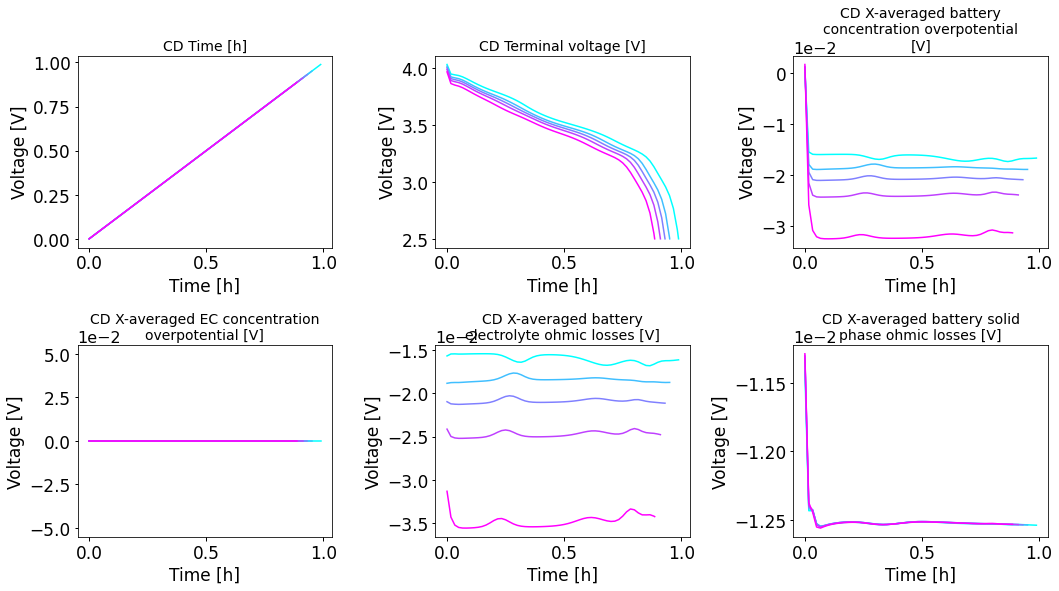

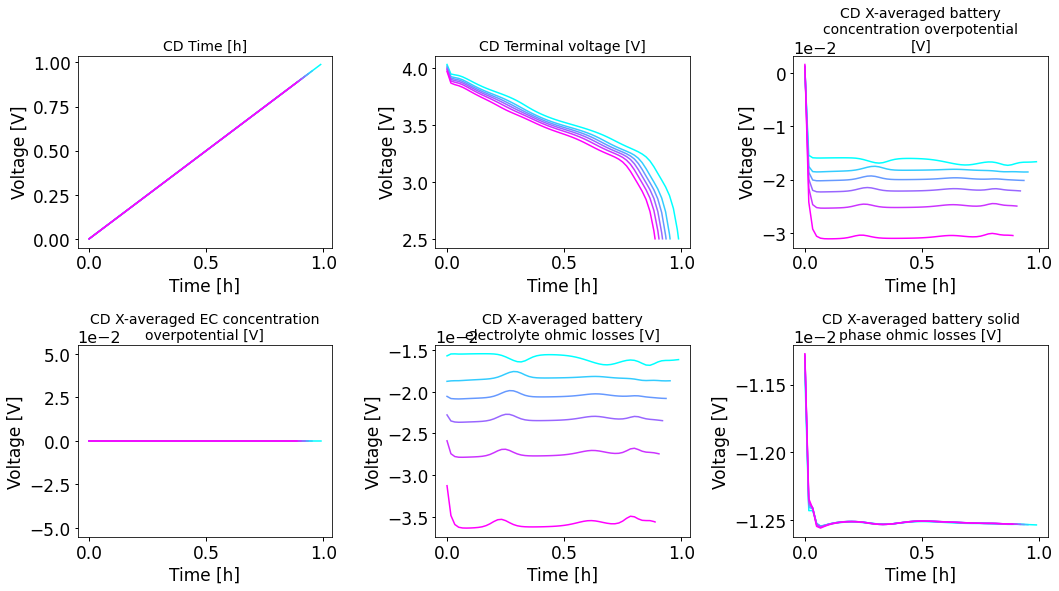

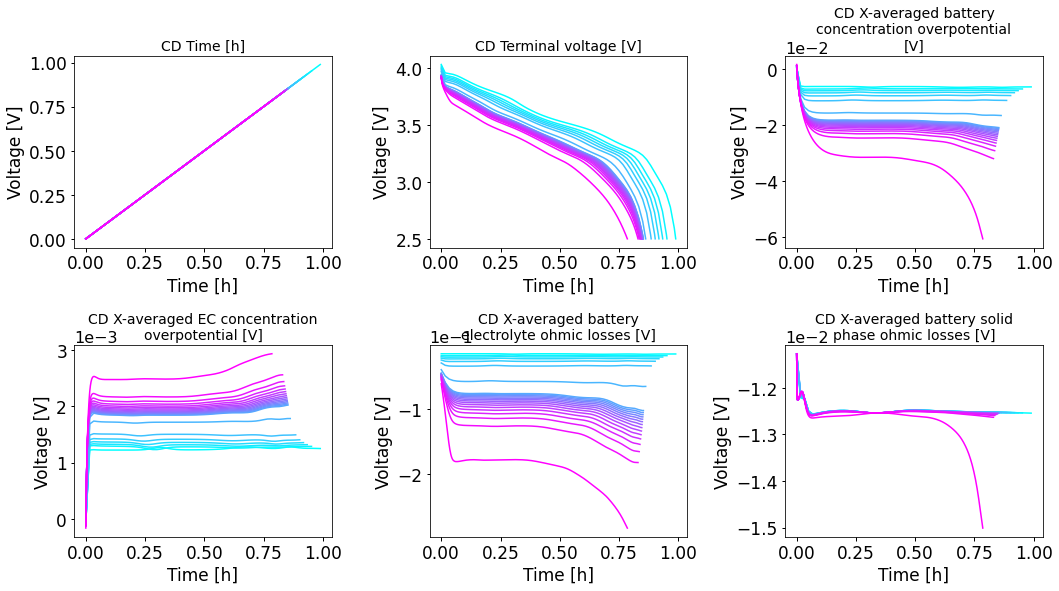

In [ ]:
# ['Andrew', 'Constant', 'Valoen']
# sequence: 'Model_DFN',  'Model_SD', 'Model_DD' 

# access Andrew - Model_DD:
#print(Round_P3R11_Long['Andrew']['3']["CD Terminal voltage [V]"][0])
# plot voltage decomposition 
Str=[ 'DFN',  'Single trans', 'Double trans' ]
str_para = 'Valoen'   # "Andrew","Constant","Valoen"
#for str_para in ["Andrew","Constant","Valoen"]:
for i in range(1,4):
    key_all = [
        "CD Time [h]",
        "CD Terminal voltage [V]",
        "CD X-averaged battery concentration overpotential [V]",
        "CD X-averaged EC concentration overpotential [V]", 
        "CD X-averaged battery electrolyte ohmic losses [V]",
        "CD X-averaged battery solid phase ohmic losses [V]",    
    ]
    colormap= 'cool'
    scan_name = str(i)
    Plot_eta_decomp(str_para,scan_name,key_all,colormap,fs)
    plt.savefig(
        BasicPath  +   str_para + '_int=6e-19_2000cyc' + "/" 
        + Str[int(scan_name)-1]+ "_All_cycle_" +  "Potential decomposition.png", dpi=300)

In [ ]:
def Plot_eta_decomp(str_para,scan_name,key_all,colormap,fs):
    fig, axs = plt.subplots(2,3, figsize=(2.5*6,8.5),tight_layout=True)
    Plot_Count = 0
    for m in range(0,2):
        for n in range(0,3):
            key=key_all[Plot_Count]; Plot_Count +=1;
            var_i_all  = Round_P3R11_Long[str_para][scan_name][key][0]
            time_all = Round_P3R11_Long[str_para][scan_name]["CD Time [h]"][0]
            cmap_i = mpl.cm.get_cmap(colormap, len(time_all)) 
            for j in range(0,len(time_all)):  
                axs[m,n].plot(
                    time_all[j][0], 
                    var_i_all[j][0], '-',
                    color=cmap_i(j),)
            axs[m,n].set_title(
                "\n".join(wrap(key, 30)) # to be adjusted
                ,   fontdict={'family':'DejaVu Sans','size':fs-3})
            axs[m,n].set_xlabel('Time [h]',   fontdict={'family':'DejaVu Sans','size':fs})
            axs[m,n].set_ylabel('Voltage [V]',   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[m,n].tick_params(
                labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[m,n].ticklabel_format( 
                axis='y', style='sci',
                scilimits=[-0.01,0.01], useOffset=None, 
                useLocale=None, useMathText=None)
    return fig, axs 


In [ ]:
print(Round_P3R11_Long['Andrew']['3']["CD Terminal voltage [V]"][0][2])

[[4.01893805 3.93751139 3.9300011  3.92303821 3.91041373 3.89356823
  3.87509691 3.85677025 3.83946089 3.82345802 3.80869839 3.79491095
  3.78167193 3.76844128 3.7546647  3.73993489 3.72406029 3.70700224
  3.68880501 3.66963818 3.65004921 3.63102089 3.61315515 3.59645342
  3.58083901 3.56632061 3.55290877 3.54054488 3.52909442 3.51837422
  3.50818168 3.49831161 3.48855932 3.47871341 3.46854306 3.4577853
  3.44614076 3.43329185 3.41896394 3.40304329 3.38572043 3.36755432
  3.34934703 3.33185937 3.31553922 3.30039285 3.28596301 3.27125122
  3.25441618 3.23224016 3.20000854 3.15391231 3.09685468 3.03776914
  2.97915262 2.91132094 2.81555433 2.66316617 2.50001   ]]


: 